In [1]:
__title__ = "SML HW2 Q3"
__author__ = "Mohammadreza Ghofrani"
__stdid__ = "400131076"

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib import pyplot as plt

In [20]:
data = pd.read_csv('data/earthquake fiji/quakes.csv')
d = np.array(data['mag'].sort_values())

# Part a

In [12]:
F = np.vectorize(lambda x: sum(d < x) / len(d))

# Part b

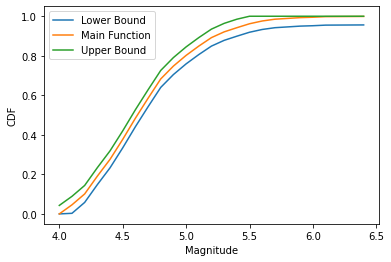

In [58]:
n = len(d)
alpha = 0.05

eps = np.sqrt((1/(2*n)) * np.log(2/alpha))

L = np.vectorize(lambda x: max(F(x) - eps, 0.0))
U = np.vectorize(lambda x: min(F(x) + eps, 1.0))

plt.plot(d, L(d), label='Lower Bound')
plt.plot(d, F(d), label='Main Function')
plt.plot(d, U(d), label='Upper Bound')
plt.xlabel('Magnitude')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Part c

In [65]:
value = F(4.9) - F(4.3)

## Pivotal

In [66]:
B = 1000

b_vectors = []
sample_size = len(d)
for i in range(B):
    D_star = np.random.choice(d, sample_size, replace=True)
    F_star = np.vectorize(lambda x: sum(D_star < x) / len(D_star))
    b_vectors.append(F_star(4.9) - F_star(4.3))

b_vectors = np.array(b_vectors)

In [67]:
print(f"95% Confidence Interval Using Pivot Method: [{2*value - np.quantile(b_vectors, .975):.4f}, {2*value - np.quantile(b_vectors, .025):.4f}]")

95% Confidence Interval Using Pivot Method: [0.5260, 0.5890]


## Normal

In [68]:
alpha = 0.05
z_95 = norm.ppf(1-alpha/2)
se = np.sqrt(value * (1 - value) / n)

print(f'95% confidence interval: ({value - z_95 * se:.4f}, {value + z_95 * se:.4f})')

95% confidence interval: (0.5262, 0.5878)


## Percentile

In [69]:
print(f"95% Confidence Interval Using Norm  al Method: [{np.quantile(b_vectors, .025):.4f}, {np.quantile(b_vectors, .975):.4f}]")

95% Confidence Interval Using Norm  al Method: [0.5250, 0.5880]
